# Cleaning db

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

%matplotlib inline

In [8]:
pd.options.display.max_columns = 100

In [9]:
df = pd.read_csv('encuesta.csv')
zat = pd.read_csv('zat.csv', sep=";")

In [10]:
del df['FACTOR_AJUSTE']
del df['FACTOR_AJUSTE_TRANSMILENIO']
del df['PI_K_I']
del df['PI_K_II']
del df['PI_K_III']
del df['FE_TOTAL']
del df['PONDERADOR_CALIBRADO_VIAJES']
del df['PONDERADOR_CALIBRADO']

In [11]:
zat[:1]

,Geo Point,Geo Shape,y_coord,Zona_Num_N,id,x_coord,AREA
0,"4.15933500918, -74.3928242522","{""type"": ""Polygon"", ""coordinates"": [[[-74.2097...",4.159335,800,6,-74.392824,1821.94


In [12]:
df[:1]

,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL
0,18390069,2,1,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,08:05:00,09:55:00,TPC-SITP,238.0,566.0,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.merge(zat, left_on='ZAT_ORIGEN', right_on='Zona_Num_N')
df.rename({'y_coord':'y_coord_org', 'x_coord': 'x_coord_org'}, inplace=True, axis=1)
df.drop(['id','Zona_Num_N', 'AREA', 'Geo Shape', 'Geo Point'], inplace=True, axis=1)

df = df.merge(zat, left_on='ZAT_DESTINO', right_on='Zona_Num_N')
df.rename({'y_coord':'y_coord_dest', 'x_coord': 'x_coord_dest'}, inplace=True, axis=1)
df.drop(['id','Zona_Num_N', 'AREA', 'Geo Shape', 'Geo Point'], inplace=True, axis=1)

In [14]:
df[:1]

,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,y_coord_org,x_coord_org,y_coord_dest,x_coord_dest
0,18390069,2,1,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,08:05:00,09:55:00,TPC-SITP,238,566,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN,4.611812,-74.19115,4.652134,-74.068821


In [15]:
df.MUNICIPIO_DESTINO.value_counts()

BOGOTA-DC 11001                  85283
SOACHA-cundinamarca 25754         7332
FACATATIVA-cundinamarca 25269     6436
CHIA-cundinamarca 25175           6281
ZIPAQUIRA-cundinamarca 25899      6028
FUNZA-cundinamarca 25286          3549
TOCANCIPA-cundinamarca 25817      3291
MADRID-cundinamarca 25430         3203
MOSQUERA-cundinamarca 25473       3188
COTA-cundinamarca 25214           2930
CAJICA-cundinamarca 25126         2598
SOPO-cundinamarca 25758           2504
LA CALERA 25377                   2351
BOJACA-cundinamarca 25099         2312
GACHANCIPA-cundinamarca 25295     2199
SIBATE-cundinamarca 25740         1974
TENJO-cundinamarca 25799          1828
TABIO-cundinamarca 25785          1663
Name: MUNICIPIO_DESTINO, dtype: int64

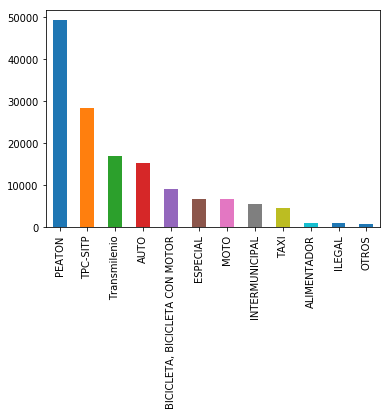

In [16]:
df.MEDIO_PREDOMINANTE.value_counts(dropna=False, normalize=False).plot(kind='bar')

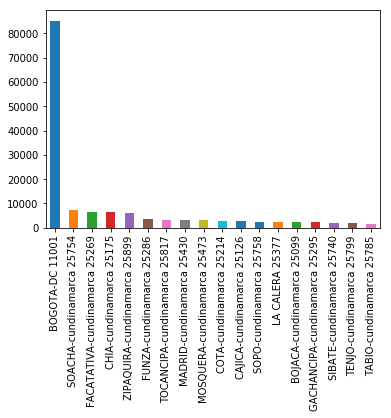

In [17]:
df.MUNICIPIO_ORIGEN.value_counts().plot(kind='bar')

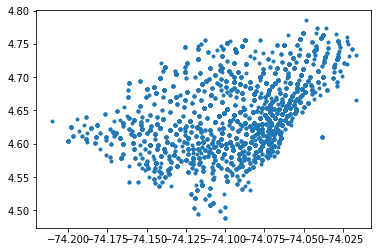

In [18]:
plt.plot(df.loc[(df.MUNICIPIO_ORIGEN.str.contains('BOGOTA') == True) & (df.MEDIO_PREDOMINANTE == 'TAXI'), 'x_coord_org'], df.loc[(df.MUNICIPIO_ORIGEN.str.contains("BOGOTA") == True) & (df.MEDIO_PREDOMINANTE == 'TAXI'), 'y_coord_org'], '.')


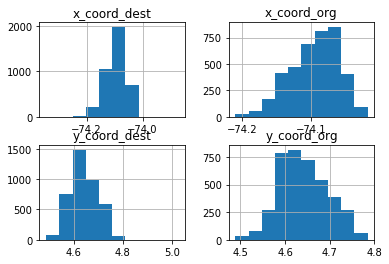

In [19]:
df.loc[(df.MUNICIPIO_ORIGEN.str.contains('BOGOTA') == True) & (df.MEDIO_PREDOMINANTE == 'TAXI'), ['x_coord_org','y_coord_org','x_coord_dest','y_coord_dest']].hist();

In [20]:
df.to_csv('./encuesta_corregida.csv')

---

# Distribution

In [21]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

%matplotlib inline

In [22]:
df = pd.read_csv('encuesta_corregida.csv')
df.loc[df.HORA_FIN.str.contains("24:00:00"), "HORA_FIN"] = "00:00:00"
df.loc[:,'HORA_FIN'] = pd.to_datetime(df.HORA_FIN, format="%H:%M:%S")
df.loc[:,'HORA_INICIO'] = pd.to_datetime(df.HORA_INICIO, format="%H:%M:%S")

In [23]:
df[:1]

,Unnamed: 0,ID_ENCUESTA,NUMERO_PERSONA,NUMERO_VIAJE,MOTIVOVIAJE,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,TIEMPO_CAMINO,HORA_INICIO,HORA_FIN,MEDIO_PREDOMINANTE,ZAT_DESTINO,ZAT_ORIGEN,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN,LATITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_ORIGEN,LONGITUD_DESTINO,DIFERENCIA_HORAS,DIA_HABIL,DIA_NOHABIL,PICO_HABIL,PICO_NOHABIL,VALLE_NOHABIL,VALLE_HABIL,y_coord_org,x_coord_org,y_coord_dest,x_coord_dest
0,0,18390069,2,1,Tramites,BOGOTA-DC 11001,Bogota D.C.,10.0,1900-01-01 08:05:00,1900-01-01 09:55:00,TPC-SITP,238.0,566.0,BOGOTA-DC 11001,Bogota D.C.,4.613055e+13,4.650268e+13,-7.419059e+13,-7.406759e+13,01:50:00,S,NaN,NaN,NaN,NaN,NaN,4.611812,-74.19115,4.652134,-74.068821


In [24]:
df.MEDIO_PREDOMINANTE.unique()

array(['TPC-SITP', 'PEATON', 'Transmilenio', 'ESPECIAL', 'AUTO', 'MOTO',
       'TAXI', 'BICICLETA, BICICLETA CON MOTOR', 'OTROS', 'ILEGAL',
       'ALIMENTADOR', 'INTERMUNICIPAL'], dtype=object)

In [25]:
df = df.loc[(df.MUNICIPIO_DESTINO == 'BOGOTA-DC 11001') & (df.MUNICIPIO_ORIGEN == 'BOGOTA-DC 11001') & (df.MEDIO_PREDOMINANTE == 'TAXI')]

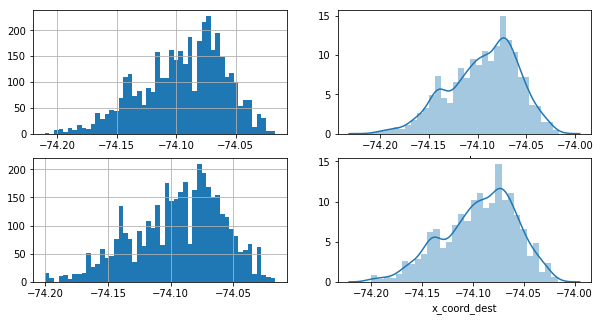

In [26]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(5)
fig.set_figwidth(10)

df.x_coord_org.hist(bins=50, ax=axs[0,0])
sns.distplot(df.x_coord_org, ax=axs[0,1])

df.x_coord_dest.hist(bins=50, ax=axs[1,0])
sns.distplot(df.x_coord_dest, ax=axs[1,1])

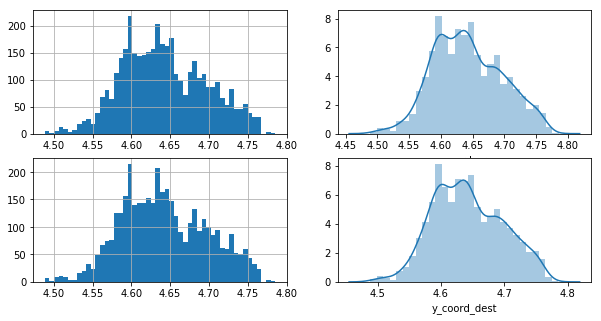

In [27]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(5)
fig.set_figwidth(10)

df.y_coord_org.hist(bins=50, ax=axs[0,0])
sns.distplot(df.y_coord_org, ax=axs[0,1])

df.y_coord_dest.hist(bins=50, ax=axs[1,0])
sns.distplot(df.y_coord_dest, ax=axs[1,1]);

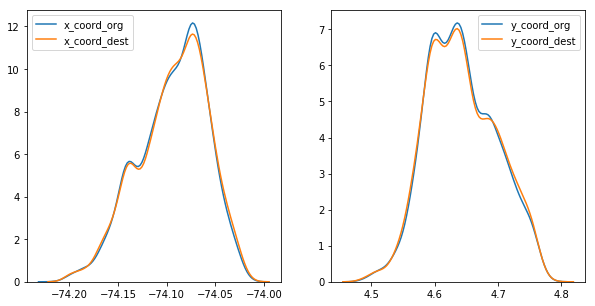

In [28]:
fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

sns.kdeplot(df.x_coord_org, ax=axs[0])
sns.kdeplot(df.x_coord_dest, ax=axs[0])

sns.kdeplot(df.y_coord_org, ax=axs[1])
sns.kdeplot(df.y_coord_dest, ax=axs[1]);

In [29]:
for i in range(24):
    fig = sns.distplot(df.loc[df.HORA_INICIO.dt.hour == i,'x_coord_org'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=-74.2,upper=-74)
    fig.figure.savefig('imgs/x_org/'+str(i)+'.png')
    plt.clf()
    
    fig = sns.distplot(df.loc[df.HORA_INICIO.dt.hour == i,'y_coord_org'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=4.3,upper=4.9)
    fig.figure.savefig('imgs/y_org/'+str(i)+'.png')
    plt.clf()
    
    fig = sns.distplot(df.loc[df.HORA_FIN.dt.hour == i,'x_coord_dest'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=-74.2,upper=-74)
    fig.figure.savefig('imgs/x_dest/'+str(i)+'.png')
    plt.clf()
    
    fig = sns.distplot(df.loc[df.HORA_FIN.dt.hour == i,'y_coord_dest'])
    fig.set_ybound(upper=35)
    fig.set_xbound(lower=4.3,upper=4.9)
    fig.figure.savefig('imgs/y_dest/'+str(i)+'.png')
    plt.clf();

In [30]:
for i in range(24):
    print(i, df.loc[df.HORA_INICIO.dt.hour == i,'x_coord_org'].shape)

0 (3,)
1 (8,)
2 (9,)
3 (18,)
4 (65,)
5 (98,)
6 (271,)
7 (254,)
8 (234,)
9 (235,)
10 (239,)
11 (226,)
12 (311,)
13 (205,)
14 (197,)
15 (269,)
16 (223,)
17 (292,)
18 (217,)
19 (191,)
20 (114,)
21 (76,)
22 (111,)
23 (57,)


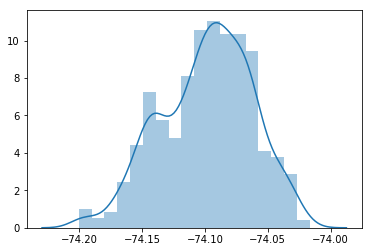

In [31]:
# dist only for hours between 00:00 and 09:59
sns.distplot(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), 'x_coord_org'].values)

In [32]:
gm = GaussianMixture(4)
gm.fit(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), 'x_coord_org'].values.reshape(-1, 1));

In [33]:
gm.means_

array([[-74.10486024],
       [-74.05186769],
       [-74.08020221],
       [-74.14363597]])

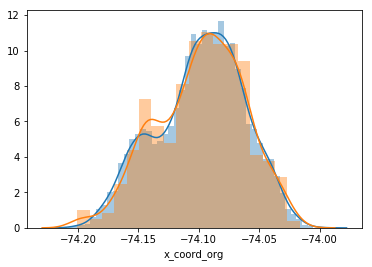

In [34]:
sns.distplot((gm.sample(10000))[0])
sns.distplot(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), 'x_coord_org'])

---
# Generating the bivariate gaussian mixture

In [35]:
n = 5
gmb =GaussianMixture(n, max_iter=10000)#, means_init=[(), (), ()])
gmb.fit(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), ['x_coord_org','y_coord_org']].values.reshape(-1, 2))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=10000,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [36]:
x = np.linspace(-74.25, -74)
y = np.linspace(4.5, 4.75)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmb.score_samples(XX)
Z = Z.reshape(X.shape)

C:\Users\danpa\Anaconda3\lib\site-packages\matplotlib\contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


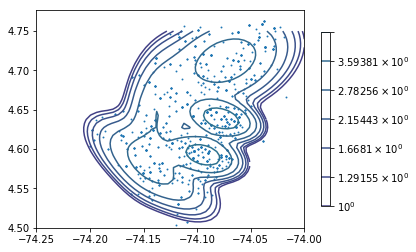

In [37]:
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=0.2, vmax=1000.0),
                 levels=np.logspace(0, 1, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), ['x_coord_org','y_coord_org']].values.reshape(-1, 2)[:, 0], df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), ['x_coord_org','y_coord_org']].values.reshape(-1, 2)[:, 1], .8)

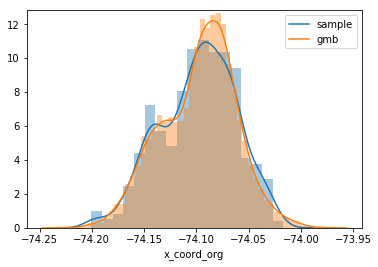

In [38]:
sns.distplot(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), 'x_coord_org'], kde_kws={"label":"sample"})
sns.distplot((gmb.sample(10000))[0].reshape(-1,2).T[0], kde_kws={"label":"gmb"})

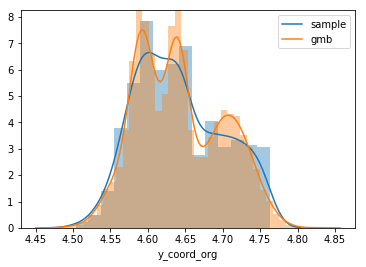

In [39]:
sns.distplot(df.loc[(df.HORA_INICIO.dt.hour > 0) & (df.HORA_INICIO.dt.hour < 9), 'y_coord_org'], hist=True, kde_kws={"label":"sample"})
sns.distplot((gmb.sample(10000))[0].reshape(-1,2).T[1], hist=True, kde_kws={"label": "gmb"},)

In [40]:
gmb.means_

array([[-74.07286554,   4.71242202],
       [-74.14213533,   4.57764404],
       [-74.07747997,   4.63866494],
       [-74.13710332,   4.64111961],
       [-74.09412809,   4.59274378]])

In [41]:
gmb.weights_

array([0.29668051, 0.16536776, 0.19883591, 0.13959103, 0.19952478])

In [42]:
gmb.covariances_

array([[[ 8.83166911e-04,  2.67375558e-04],
        [ 2.67375558e-04,  8.89891875e-04]],

       [[ 7.28846013e-04, -5.43744063e-04],
        [-5.43744063e-04,  8.81888664e-04]],

       [[ 2.20950709e-04, -5.60479591e-05],
        [-5.60479591e-05,  1.43793048e-04]],

       [[ 2.41320732e-04,  1.40122186e-04],
        [ 1.40122186e-04,  1.72581681e-03]],

       [[ 2.24528704e-04, -6.12365836e-05],
        [-6.12365836e-05,  1.58669671e-04]]])

In [43]:
gaussian_mixture_sample = []
size = 1000

In [44]:
for i in range(n):
    gaussian_mixture_sample.extend(np.random.normal(loc=gmb.means_[i][0], size=int(size*gmb.weights_[i])))

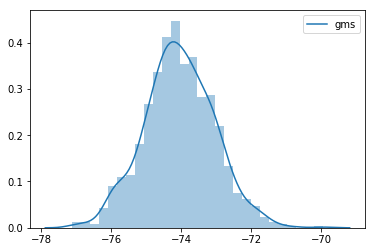

In [45]:
sns.distplot(gaussian_mixture_sample, kde_kws={"label":"gms"})
#sns.distplot((gmb.sample(10000))[0].reshape(-1,2).T[0], kde_kws={"label":"gmb"}, norm_hist=True, hist=False)

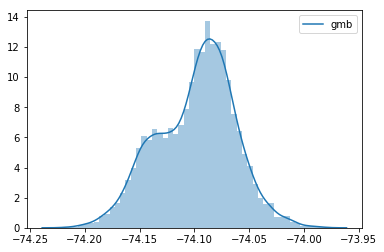

In [46]:
sns.distplot((gmb.sample(10000))[0].reshape(-1,2).T[0], kde_kws={"label":"gmb"}, norm_hist=True)

In [ ]:
list2= []
list2.extend(np.random.normal(loc=-1, size=1000))
list2.extend(np.random.normal(loc=3, size=1000))

In [ ]:
test = GaussianMixture(1, covariance_type="spherical", max_iter=1000)
test.fit(np.random.normal(loc=1, size=1000, scale=4.).reshape(1, -1))

In [ ]:
list3 = test.sample()[0]

In [ ]:
test.covariances_

In [ ]:
#sns.distplot(list3[0], hist=False, kde_kws={"label":"sample from kde"})
sns.distplot(np.random.normal(loc=1, size=1000, scale=4.), hist=False, kde_kws={"label":"org"})
sns.distplot(np.random.normal(loc=test.means_[0], scale=(test.covariances_[0]**0.5)), hist=False)#, kde_kws={"label","recon"});

---
# Reconstructing real data

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

%matplotlib inline

In [ ]:
df = pd.read_csv('encuesta_corregida.csv')

df = df.loc[(df.MUNICIPIO_DESTINO == 'BOGOTA-DC 11001') & (df.MUNICIPIO_ORIGEN == 'BOGOTA-DC 11001') & (df.MEDIO_PREDOMINANTE == 'TAXI')]
df.loc[df.HORA_FIN.str.contains("24:00:00"), "HORA_FIN"] = "00:00:00"
df.loc[:,'HORA_FIN'] = pd.to_datetime(df.HORA_FIN, format="%H:%M:%S")
df.loc[:,'HORA_INICIO'] = pd.to_datetime(df.HORA_INICIO, format="%H:%M:%S")

df = df.loc[(df.MUNICIPIO_DESTINO == 'BOGOTA-DC 11001') & (df.MUNICIPIO_ORIGEN == 'BOGOTA-DC 11001') & (df.MEDIO_PREDOMINANTE == 'TAXI')]

In [ ]:
df.loc[:,'x_coord_org'] = (df.x_coord_org - df.x_coord_org.min()) / (df.x_coord_org.max() - df.x_coord_org.min()) * 30
df.loc[:,'y_coord_org'] = (df.y_coord_org - df.y_coord_org.min()) / (df.y_coord_org.max() - df.y_coord_org.min()) * 30 / ((df.x_coord_org.max() - df.x_coord_org.min()) / (df.y_coord_org.max() - df.y_coord_org.min()))

In [ ]:
n = 10
gmb = GaussianMixture(n, max_iter=10000, covariance_type="spherical")
gmb.fit(df.loc[:,['x_coord_org','y_coord_org']].values.reshape(-1, 2));

In [ ]:
gmb.weights_

In [ ]:
cumulative_w = []
w = 0
for weight in gmb.weights_:
    w += weight
    cumulative_w.append(w)
    print w

In [ ]:
gmb.means_

In [ ]:
gmb.covariances_

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].plot(df.x_coord_org, df.y_coord_org, '.')
sample = gmb.sample(1000)[0].T
plt.plot(sample[0], sample[1],'.')

In [ ]:
sns.distplot(sample[0])
sns.distplot(df.x_coord_org)

In [ ]:
reconstruction_sample = []
size = 1500
for i in range(n):
    xs = np.random.normal(loc=gmb.means_[i][0], scale=(gmb.covariances_[i]**0.5), size=int(size*gmb.weights_[i]))
    ys = np.random.normal(loc=gmb.means_[i][1], scale=(gmb.covariances_[i]**0.5), size=int(size*gmb.weights_[i]))
    reconstruction_sample.extend(np.vstack((xs,ys)).T)
    
reconstruction_sample = np.array(reconstruction_sample)

In [ ]:
fig, axs = plt.subplots(1,3)
axs[0].plot(df.x_coord_org, df.y_coord_org, '.')
axs[0].set_title("original data")

sample = gmb.sample(size)[0].T
axs[1].plot(sample[0], sample[1],'.')
axs[1].set_title("sample from gaussian mixture")

axs[2].plot(reconstruction_sample.T[0], reconstruction_sample.T[1],'.')
axs[2].set_title("sample from gaussian mixture's attributes")

fig.set_figwidth(20)

In [ ]:
to_csv = pd.DataFrame(index=range(n), columns=['w','std','mean_x','mean_y'])

In [ ]:
to_csv.loc[:,'w'] = cumulative_w
to_csv.loc[:,'std'] = gmb.covariances_ ** 0.5
to_csv.loc[:,['mean_x', 'mean_y']] = gmb.means_

In [ ]:
to_csv.to_csv('netlogo_reader/org.csv')